In [ ]:
! pip install pandas tqdm nltk matplotlib

In [112]:
import pandas as pd
import nltk
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from tqdm import tqdm

nltk.download('punkt')
tqdm.pandas()

train_stances = pd.read_csv('train_stances.csv', index_col="Body ID")
train_bodies = pd.read_csv('train_bodies.csv', index_col="Body ID")

test_stances = pd.read_csv('competition_test_stances.csv', index_col="Body ID")
test_bodies = pd.read_csv('competition_test_bodies.csv', index_col="Body ID")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thomasvant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
model = "xsum"

train_bodies_summary_xsum = pd.read_csv(f'train_bodies_google_pegasus-{model}.csv', index_col="Body ID")
test_bodies_summary_xsum = pd.read_csv(f'test_bodies_google_pegasus-{model}.csv', index_col="Body ID")

In [109]:
model = "cnn_dailymail"

train_bodies_summary_cnn_dailymail = pd.read_csv(f'train_bodies_google_pegasus-{model}.csv', index_col="Body ID")
test_bodies_summary_cnn_dailymail = pd.read_csv(f'test_bodies_google_pegasus-{model}.csv', index_col="Body ID")

# Comparison of datasets

In [69]:
train_bodies_summary_xsum

,articleBody
Body ID,
0,A small meteorite crashed into a wooded area i...
4,A woman dressed in a hazmat suit was spotted w...
5,It's 20 years old.
6,"The Islamic State of Iraq and the Levant, also..."
7,At least 25 suspected Boko Haram insurgents we...
...,...
2528,Three British men waging jihad in the Middle E...
2529,Microsoft is the first company in Silicon Vall...
2530,A top military official in Nigeria has reporte...


In [100]:
train_bodies["XSum"] = train_bodies_summary_xsum["articleBody"]
train_bodies["CNN/DailyMail"] = train_bodies_summary_cnn_dailymail["articleBody"]
train_bodies.rename(columns={"articleBody":"Original text"}, inplace=True)

In [107]:
print(train_bodies.loc[[7]].transpose().style.to_latex())

\begin{tabular}{ll}
Body ID & 7 \\
Original text & At least 25 suspected Boko Haram insurgents were killed in clashes between soldiers and the Islamist militants in northeast Nigeria and five civilians were killed in fighting elsewhere in the region, a military source and residents said on Monday.

A ceasefire agreement between Boko Haram and the Nigerian government was expected to lead to the liberation of more than 200 schoolgirls kidnapped by the militants six months ago, and talks were due to continue in neighbouring Chad on Monday.

Boko Haram has not confirmed the truce and there have been at least six attacks over the weekend – blamed by security sources on the insurgents – that have killed several dozen people since the announcement of the ceasefire.

A government spokesman has said that the fighting on Sunday may be the work of criminal gangs in the lawless region.

An army officer, who requested anonymity, said the militants tried to enter the town of Damboa late on Sunday th

In [95]:
print(train_bodies.loc[[6]].transpose().to_latex())

\begin{tabular}{ll}
\toprule
Body ID &                                                  6 \\
\midrule
articleBody   &  Posting photos of a gun-toting child online, I... \\
XSum          &  The Islamic State of Iraq and the Levant, also... \\
CNN/DailyMail &  ISIS supporters announced that the group’s you... \\
\bottomrule
\end{tabular}



/var/folders/rz/8k861z6j0_l46v42bkk8qf1m0000gn/T/ipykernel_25435/3973549736.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(train_bodies.loc[[6]].transpose().to_latex())


# Reduction calculation

In [113]:
count = train_bodies["articleBody"].progress_apply(lambda x: len(nltk.word_tokenize(x)))
count_summary = test_bodies_summary_cnn_dailymail["articleBody"].progress_apply(lambda x: len(nltk.word_tokenize(x)))

100%|███████████████████████████████████████| 904/904 [00:00<00:00, 7292.38it/s]


In [114]:
reduction = count_summary / count

In [55]:
new_train_bodies_summary = train_bodies_summary

In [ ]:
new_train_bodies_summary[reduction > 1.0] = train_bodies[reduction > 1.0]

In [59]:
new_train_bodies_summary[new_train_bodies_summary["articleBody"] == train_bodies["articleBody"]]

,articleBody
Body ID,
144,There have been reports that iOS 8 preferences...
347,UK aid worker Henning has reportedly been trie...
368,#ISIS beheads photojournalist James Wright Fol...
442,Rumors have been circulating that the Apple Wa...
581,UK Prime Minister David Cameron condemned the ...
...,...
2412,Reporting in the Telegraph states that US dron...
2424,A TYPE of super-strong magic mushroom has been...
2440,UK Prime Minister Cameron confirmed Haines' de...


In [60]:
new_count_summary = new_train_bodies_summary["articleBody"].progress_apply(lambda x: len(nltk.word_tokenize(x)))

100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 5739.62it/s]


<AxesSubplot:>

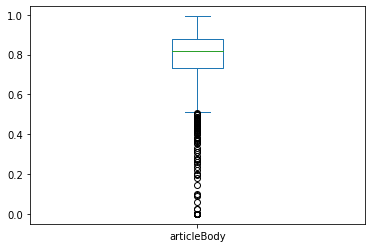

In [63]:
abs((new_count_summary - count) / count).plot.box()

In [108]:
new_train_bodies_summary.to_csv("train_bodies_google_pegasus-cnn_dailymail_cleaned.csv")